# Decision Tree 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
df=pd.read_csv("data/insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

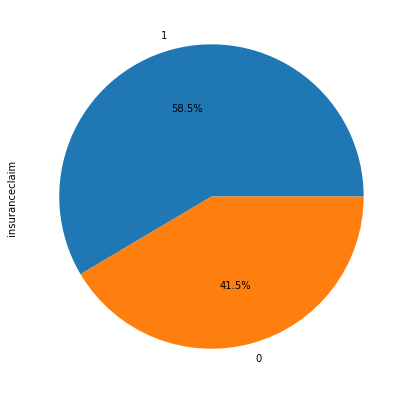

In [8]:
plt.figure(figsize=(7,7))
df["insuranceclaim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

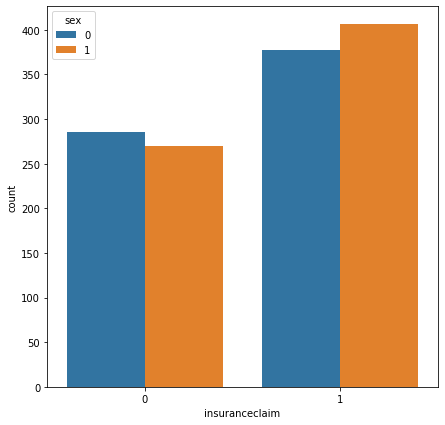

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()

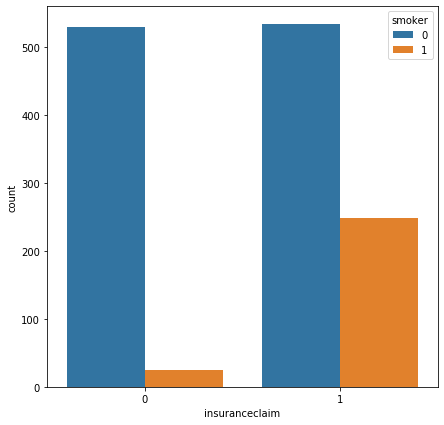

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

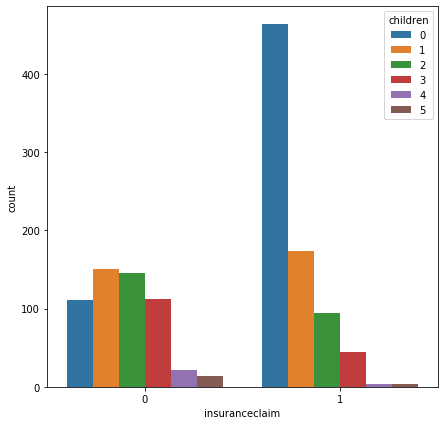

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

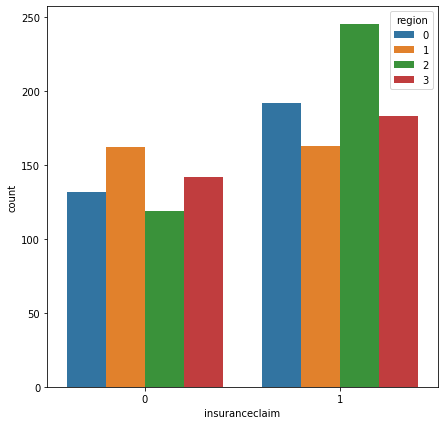

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

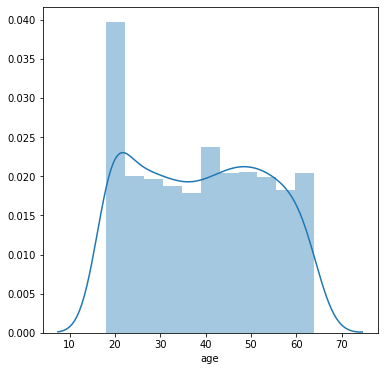

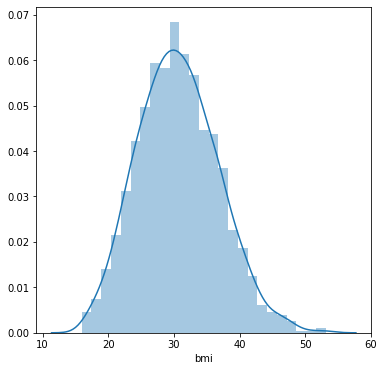

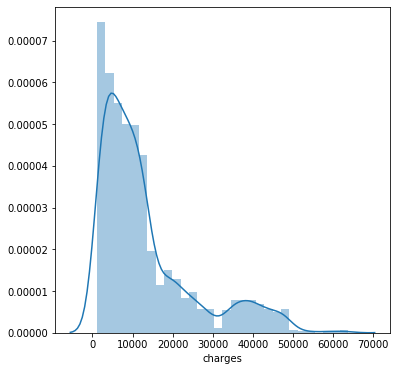

In [13]:
cols = ["age","bmi","charges"]
for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

In [14]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [31]:
#min_sample_leaf parameter save us from overfit situation but m=it may do data loss while training
dt=DecisionTreeClassifier(min_samples_leaf=90)
dt.fit(x_train,y_train)
dt_score_tr=dt.score(x_train,y_train)
dt_score_te=dt.score(x_test,y_test)

In [32]:
dt_score_tr

0.813034188034188

In [33]:
dt_score_te

0.8159203980099502

In [34]:
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       157
           1       0.84      0.86      0.85       245

    accuracy                           0.82       402
   macro avg       0.81      0.80      0.81       402
weighted avg       0.81      0.82      0.82       402



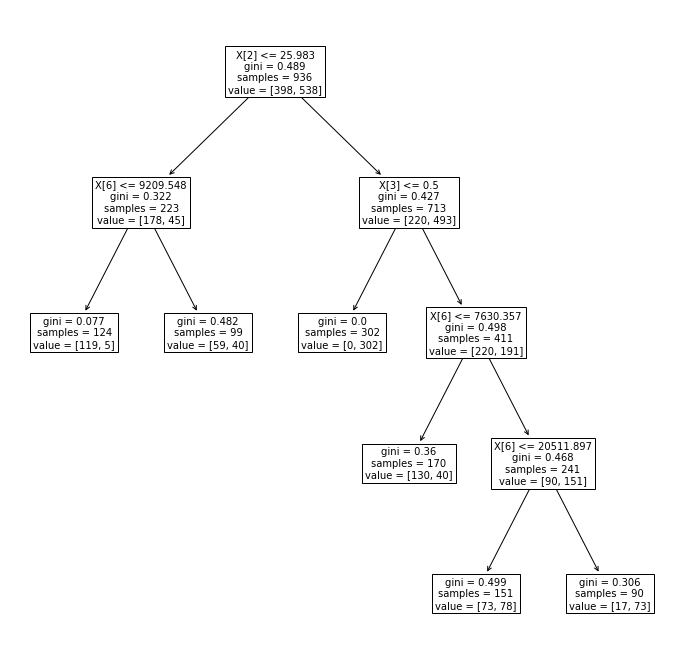

In [35]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(dt.fit(x_train,y_train),max_depth=4,fontsize=10)
plt.savefig("tree_high_dpi_insurance",dpi=100)

In [ ]:
# make AUC and ROC using 2 decision tree classifiers  with diff sample size 